In [1]:
import pandas as pd
data = pd.read_csv('/Users/ellen/OneDrive/Documents/Python/archive/WELFake_Dataset.csv')
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [2]:
data.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [3]:
data.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [4]:
data = data.dropna()
print("Original DataFrame shape:", data.shape)
print("New DataFrame shape:", data.shape)
data.isnull().sum()

Original DataFrame shape: (71537, 4)
New DataFrame shape: (71537, 4)


Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [44]:
data.label.value_counts()

label
1    36509
0    35028
Name: count, dtype: int64

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score

In [6]:
# Combining title and text
data['content'] = data['title'] + ' ' + data['text']

# Drop rows with missing values
data.dropna(inplace=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['label'], test_size=0.2, random_state=42)

In [8]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [42]:
predicted = model.predict(X_test)
print(classification_report(y_test, predicted))
print("Accuracy:", round(accuracy_score(y_test, predicted)*100),'%')
score = accuracy_score(y_test, predicted)
print(score)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7081
           1       0.86      0.88      0.87      7227

    accuracy                           0.87     14308
   macro avg       0.87      0.87      0.87     14308
weighted avg       0.87      0.87      0.87     14308

Accuracy: 87 %
0.8697931227285435


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [31]:
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

[[6083  998]
 [ 865 6362]]


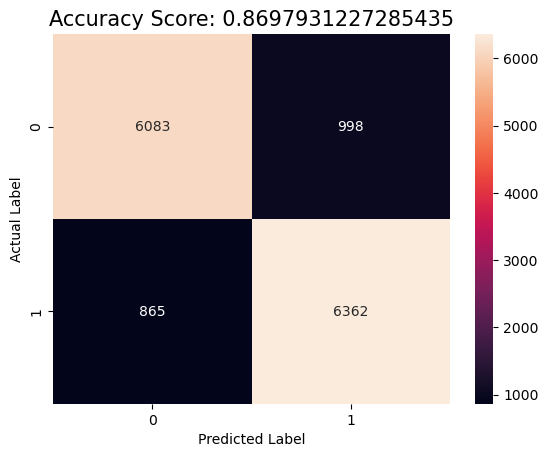

In [36]:
cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, annot = True, fmt = '')
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
# plt.title('Confusion Matrix')
all_sample_title  = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()

In [10]:
def predict_fake_news(news):
    prediction = model.predict([news])
    return 'Fake' if prediction[0] == 0 else 'Real'
# Example usage
print(predict_fake_news("SATAN 2: Russia unvelis an image of its terrif."))

Real


In [11]:
print(predict_fake_news("Ukraine is being invaded by russia."))

Real


In [12]:
# Example usage
print(predict_fake_news("India won the fifa worldcup."))

Fake


In [13]:
print(predict_fake_news("America gives Grand Piano to horse"))

Real


In [14]:
print(predict_fake_news("A solar flare could leave the world without internet in 2024"))

Fake


In [16]:
print(predict_fake_news("Khloe Kardashian wears matching jerseys with her daughter"))

Real


In [17]:
print(predict_fake_news("Goldman Sachs Endorses Hillary Clinton For President"))

Real


In [18]:
print(predict_fake_news("Trump tussle gives unpopular Mexican leader much-needed shot in arm"))

Fake


In [21]:
print(predict_fake_news("Satellite imagery shows more than 500 bomb craters in Gaza"))

Fake


In [22]:
print(predict_fake_news("Trump and Biden are tied among immigrant voters"))

Real


In [23]:
print(predict_fake_news("Trump urged Michigan officials not to certify 2020 vote"))

Fake
